### Beta Binomial Posterior

In [8]:
!pip install pymc > /dev/null
import pymc as pm
pm.__version__
!pip install arviz > /dev/null
import arviz as az

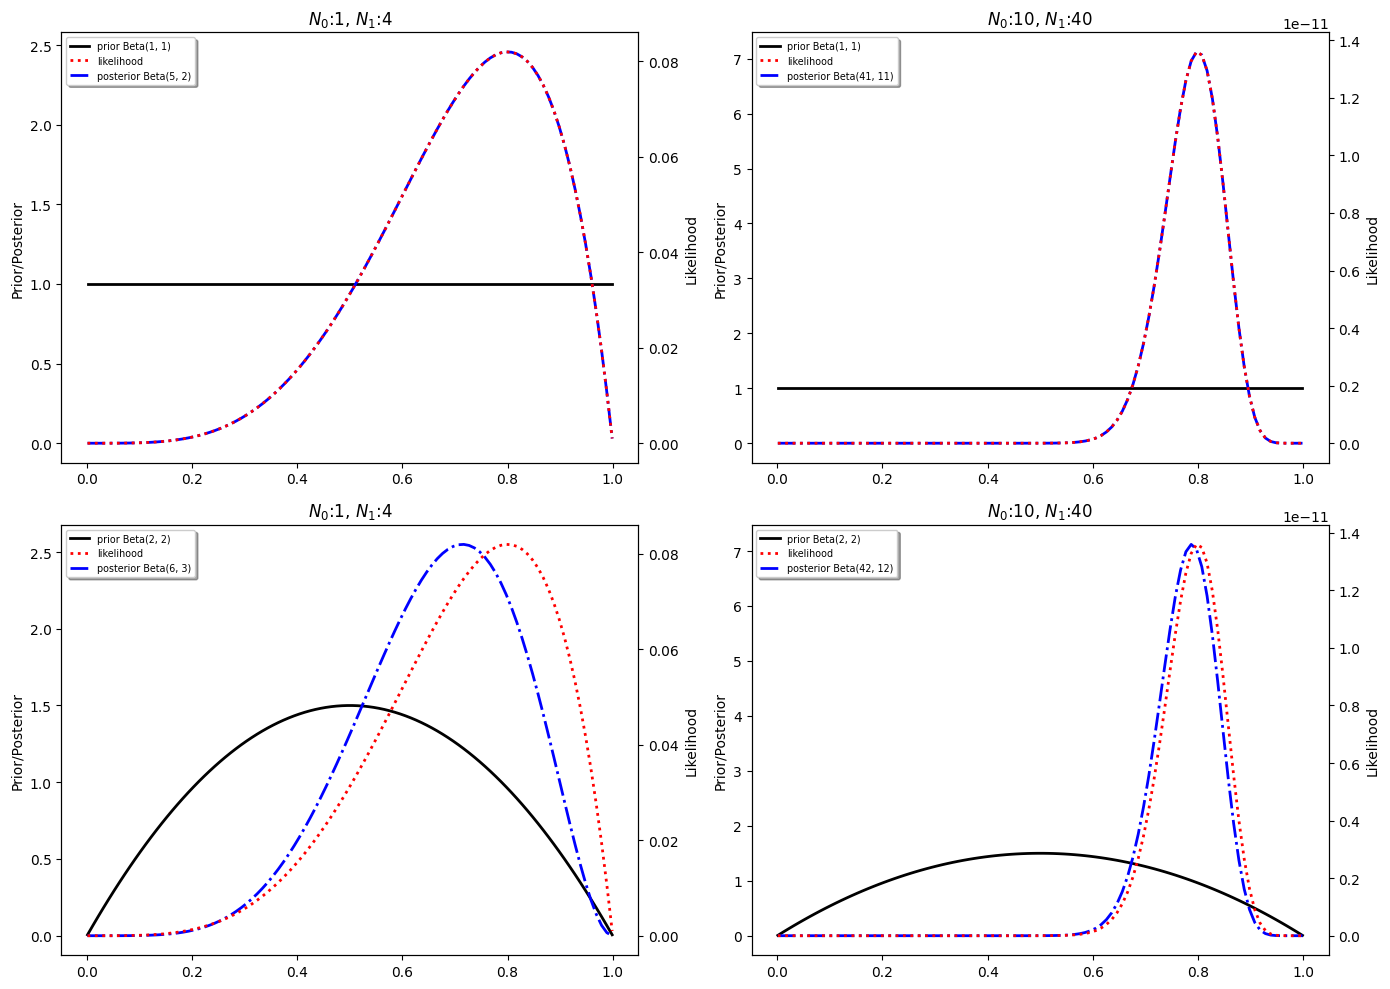

In [14]:
%matplotlib inline
import sklearn
import scipy.stats as stats
import scipy.optimize
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import os
import pandas as pd

import jax.numpy as jnp
from jax.scipy.stats import beta, bernoulli
from jax import grad, jit, vmap

import jax.numpy as jnp
from jax.scipy.stats import beta, bernoulli
import matplotlib.pyplot as plt

''' Points where we evaluate the pdf '''
x = jnp.linspace(0.001, 0.999, 100)

''' graph given the parameters of the prior, likelihood and posterior '''
def make_graph(data, ax):
    prior = beta.pdf(x, a=data["prior"]["a"], b=data["prior"]["b"])
    n_0 = data["likelihood"]["n_0"]
    n_1 = data["likelihood"]["n_1"]
    samples = jnp.concatenate([jnp.zeros(n_0), jnp.ones(n_1)])
    likelihood_function = jnp.vectorize(lambda p: jnp.exp(bernoulli.logpmf(samples, p).sum()))
    likelihood = likelihood_function(x)
    posterior = beta.pdf(x, a=data["posterior"]["a"], b=data["posterior"]["b"])

    axt = ax.twinx()
    fig1 = ax.plot(x, prior, "k", label=f"prior Beta({data['prior']['a']}, {data['prior']['b']})", linewidth=2.0)
    fig2 = axt.plot(x, likelihood, "r:", label="likelihood", linewidth=2.0)
    fig3 = ax.plot(x, posterior, "b-.", label=f"posterior Beta({data['posterior']['a']}, {data['posterior']['b']})", linewidth=2.0)

    fig_list = fig1 + fig2 + fig3
    labels = [fig.get_label() for fig in fig_list]
    ax.legend(fig_list, labels, loc="upper left", shadow=True, fontsize='x-small')
    axt.set_ylabel("Likelihood")
    ax.set_ylabel("Prior/Posterior")
    ax.set_title(f"$N_0$:{n_0}, $N_1$:{n_1}")

data_list = [
    { "prior": {"a": 1, "b": 1}, "likelihood": {"n_0": 1, "n_1": 4}, "posterior": {"a": 5, "b": 2} },
    { "prior": {"a": 1, "b": 1}, "likelihood": {"n_0": 10, "n_1": 40}, "posterior": {"a": 41, "b": 11} },
    { "prior": {"a": 2, "b": 2}, "likelihood": {"n_0": 1, "n_1": 4}, "posterior": {"a": 6, "b": 3} },
    { "prior": {"a": 2, "b": 2}, "likelihood": {"n_0": 10, "n_1": 40}, "posterior": {"a": 42, "b": 12} }
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes_flat = axes.flatten()

for i, data in enumerate(data_list):
    make_graph(data, axes_flat[i])

plt.tight_layout()
plt.show()